In [88]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [89]:
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

# 서울시 범죄 데이터

In [90]:
df = pd.read_csv('./crime_in_Seoul.csv',encoding='euc-kr',index_col='관서명')
df.head(4)

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
남대문서,1,0,6,4,65,46,"1,153",382,869,794
서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"


In [91]:
# 데이터 프레임 상관관계 확인
# 숫자가 높으면 높을수록 선형관계가 뚜렷한것 
df.corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000


In [92]:
# 살인발생과 살인검거 간의 상관관계 확인
df[['살인 발생','살인 검거']].head(3)

,살인 발생,살인 검거
관서명,,
중부서,2,2
종로서,3,3
남대문서,1,0


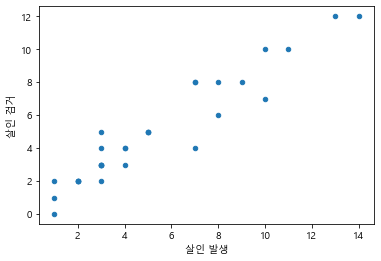

In [93]:
df.plot(kind='scatter',x='살인 발생',y='살인 검거')
plt.show()

# 교통사고 데이터

In [94]:
df2014 = pd.read_csv('./2014년 졸음운전 교통사고.csv',encoding='euc-kr')
df2015 = pd.read_csv('./2015년 졸음운전 교통사고.csv',encoding='euc-kr')
df2016 = pd.read_csv('./2016년 졸음운전 교통사고.csv',encoding='euc-kr')

In [95]:
data = pd.concat([df2014,df2015,df2016])
data.set_index('구분',inplace=True)
data

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


In [96]:
# 데이터 복사
dt = data.copy()
dt

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


# string 을 Date 타입으로 변환

In [97]:
# string 을 Date 타입으로 변환
dt.index=pd.to_datetime(dt.index,format='%Y년%m월')
dt.set_index([dt.index.year,dt.index.month],inplace=True)
dt.index.names =['연도','월']
dt

사고(건)  사망(명)  부상(명)
연도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

In [98]:
# 연도별 평균 사망자
# 월별 평균 사망자
# groupby
ydt = dt.groupby('연도').mean()[['사망(명)']]
mdt = dt.groupby('월').mean()[['사망(명)']]
display(ydt)
display(mdt)


,사망(명)
연도,
2014,10.833333
2015,9.000000
2016,8.166667


,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


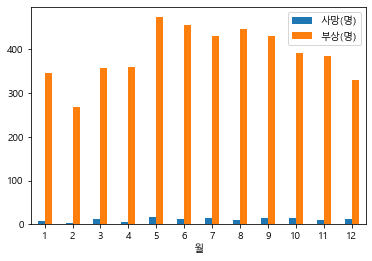

In [99]:
# 2014년도 월별 사망, 부상 데이터를 바 차트로 구현하기.
dt.loc[2014][['사망(명)','부상(명)']].plot(kind='bar',rot=0)
plt.show()

## Time Series

In [100]:
dates = pd.date_range('2016-05-01','2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [101]:
tmp1 =pd.Series([80,92,82,85,97,84,78],index=dates)
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [102]:
tmp2 =  pd.Series(np.random.randint(60,100,size=7),index=dates)
tmp2

2016-05-01    87
2016-05-02    73
2016-05-03    84
2016-05-04    95
2016-05-05    75
2016-05-06    91
2016-05-07    60
Freq: D, dtype: int32

In [103]:
# Series 를 DataFrame 으로 만들자
result = pd.DataFrame({'math':tmp1,'Philosopy':tmp2})
result

,math,Philosopy
2016-05-01,80,87
2016-05-02,92,73
2016-05-03,82,84
2016-05-04,85,95
2016-05-05,97,75
2016-05-06,84,91
2016-05-07,78,60


In [104]:
# 2016-05-05 의 데이터만 불러오기
result.loc['2016-05-05']

math         97
Philosopy    75
Name: 2016-05-05 00:00:00, dtype: int64

In [105]:
# 5-4, 5-6, 5-7 의 철학 점수만 불러오기
result['Philosopy'][[3,5,6]]

2016-05-04    95
2016-05-06    91
2016-05-07    60
Name: Philosopy, dtype: int32

In [106]:
# 1. 수학점수와 철학점수의 차 구하기
# 2. 새로운 열에 추가
a = result.math-result.Philosopy
a

2016-05-01    -7
2016-05-02    19
2016-05-03    -2
2016-05-04   -10
2016-05-05    22
2016-05-06    -7
2016-05-07    18
Freq: D, dtype: int64

In [107]:
result['difference']=a
result

,math,Philosopy,difference
2016-05-01,80,87,-7
2016-05-02,92,73,19
2016-05-03,82,84,-2
2016-05-04,85,95,-10
2016-05-05,97,75,22
2016-05-06,84,91,-7
2016-05-07,78,60,18


In [108]:
# 컬럼 이름 바꾸기
result.rename(columns={'math':'Mathmatics','difference':'diff'},inplace=True)
result

,Mathmatics,Philosopy,diff
2016-05-01,80,87,-7
2016-05-02,92,73,19
2016-05-03,82,84,-2
2016-05-04,85,95,-10
2016-05-05,97,75,22
2016-05-06,84,91,-7
2016-05-07,78,60,18


In [109]:
# result 에서 diff 칼럼을 지워주세요
result.drop('diff',axis=1,inplace=True)
result


,Mathmatics,Philosopy
2016-05-01,80,87
2016-05-02,92,73
2016-05-03,82,84
2016-05-04,85,95
2016-05-05,97,75
2016-05-06,84,91
2016-05-07,78,60


In [110]:
# and, or 중 하나 사용(&,|)
# 5/3, 5/4의 시험 점수를 데이터프레임 형태로 가져오세요.
result[(result.index == '2016-05-03')|(result.index=='2016-05-04')]

,Mathmatics,Philosopy
2016-05-03,82,84
2016-05-04,85,95


In [111]:
# and, or 중 하나 사용(&,|)
# 수학 점수가 85점 이상
# 5/5 이전의 날짜
result[(result.Mathmatics >= 85)&(result.index<='2016-05-05')]

,Mathmatics,Philosopy
2016-05-02,92,73
2016-05-04,85,95
2016-05-05,97,75


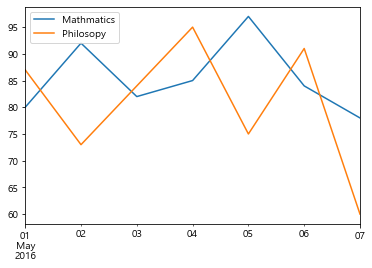

In [113]:
# 그래프로 출력
result.plot()
plt.show()

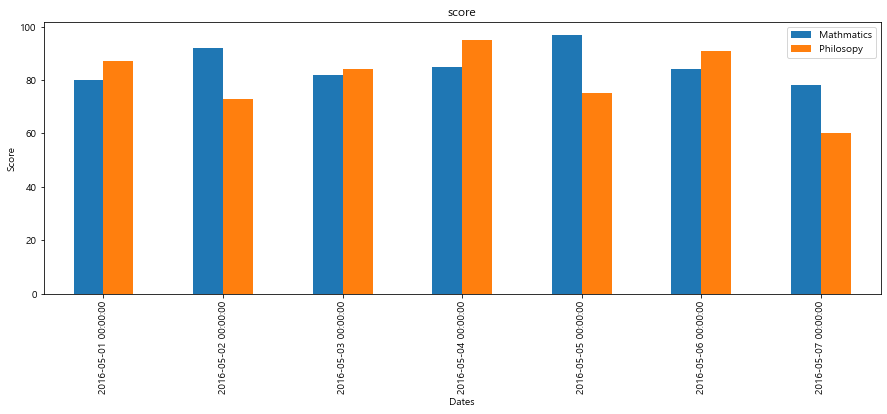

In [120]:
# 바 차트로 표현
result.plot(title='score',figsize=(15,5),kind='bar',rot=90)
plt.xlabel('Dates')
plt.ylabel('Score')
plt.show()

## IMDB 영화리뷰 데이터셋

In [121]:
#IMDB 영화리뷰 데이터셋을 인터넷에서 불러오기
movies=pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv')
movies.head(6)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [122]:
movies.shape

(979, 6)

### 영화 상영시간이 200분 이상인 영화만 필터링해보자.

In [132]:
movies[movies.duration>=200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [129]:
booleans=[]
for length in movies.duration:
    if length>=200:
        booleans.append(True)
    else:
        booleans.append(False)
booleans

[False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [130]:
# 데이터 프레임을 만들기 전에 리스트를 Series로 변환
is_long = pd.Series(booleans)
is_long.head(4)

0    False
1    False
2     True
3    False
dtype: bool

In [131]:
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


### 이번에는 장르가 Crime 또는 Drama 또는 Action 인 영화리스트 보기.

In [139]:
# 이번에는 장르가 Crime 또는 Drama 또는 Action 인 영화리스트 보기.
movies[(movies.genre == 'Crime')|(movies.genre == 'Drama')|(movies.genre == 'Action')].head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [140]:
# 'isin'
movies[movies.genre.isin(['Crime','Drama','Action'])].head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


# 각 나라별 음주 현황 데이터

In [154]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry',index_col='country')
drinks 

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
Yemen,6,0,0,0.1,Asia


In [156]:
kr_drinks = drinks[drinks.index=='South Korea']
kr_drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
South Korea,140,16,9,9.8,Asia


In [174]:
us_drinks = drinks[drinks.index=='USA']
us_drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
USA,249,158,84,8.7,North America


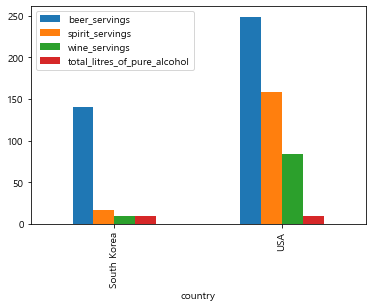

In [185]:
rs =pd.concat([kr_drinks,us_drinks])
rs.plot(kind='bar')
plt.show()


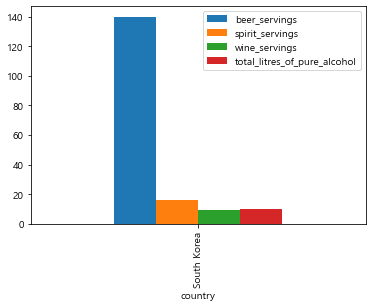

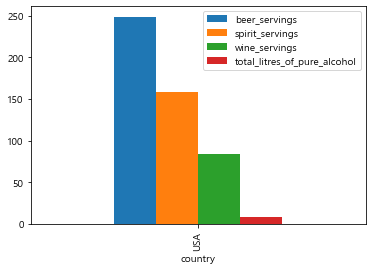

In [178]:
kr_drinks.plot(kind='bar')
us_drinks.plot(kind='bar')
plt.show()

In [148]:
avg = drinks.mean()
avg

C:\Users\user\AppData\Local\Temp\ipykernel_996\1203432369.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = drinks.mean()


beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [186]:
#  전체 데이터의 맥주 평균 소비량
drinks.beer_servings.mean()

106.16062176165804

In [190]:
# 대륙별 소비량
drinks[drinks.continent=='Africa'].wine_servings.mean()

16.264150943396228

In [192]:
# 대륙별 맥주 소비량
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [193]:
# 각 대륙별 맥주 최고 소비량
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [194]:
# 다양한 통계치를 한번에
drinks.groupby('continent').beer_servings.agg(['count','mean','min','max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333
